In [61]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 거리 계산
import math
from geopy.distance import geodesic
import geopy.distance

# 데이터 전처리
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

# 데이터 분할
from sklearn.model_selection import train_test_split

# 학습 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# 성능평가
from sklearn.model_selection import cross_val_score

# 데이터 가져오기

In [147]:
df_train = pd.read_csv('./datasets/train.csv')

# 데이터 훓어보기

In [148]:
df_train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [150]:
df_train.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


## 히스토그램

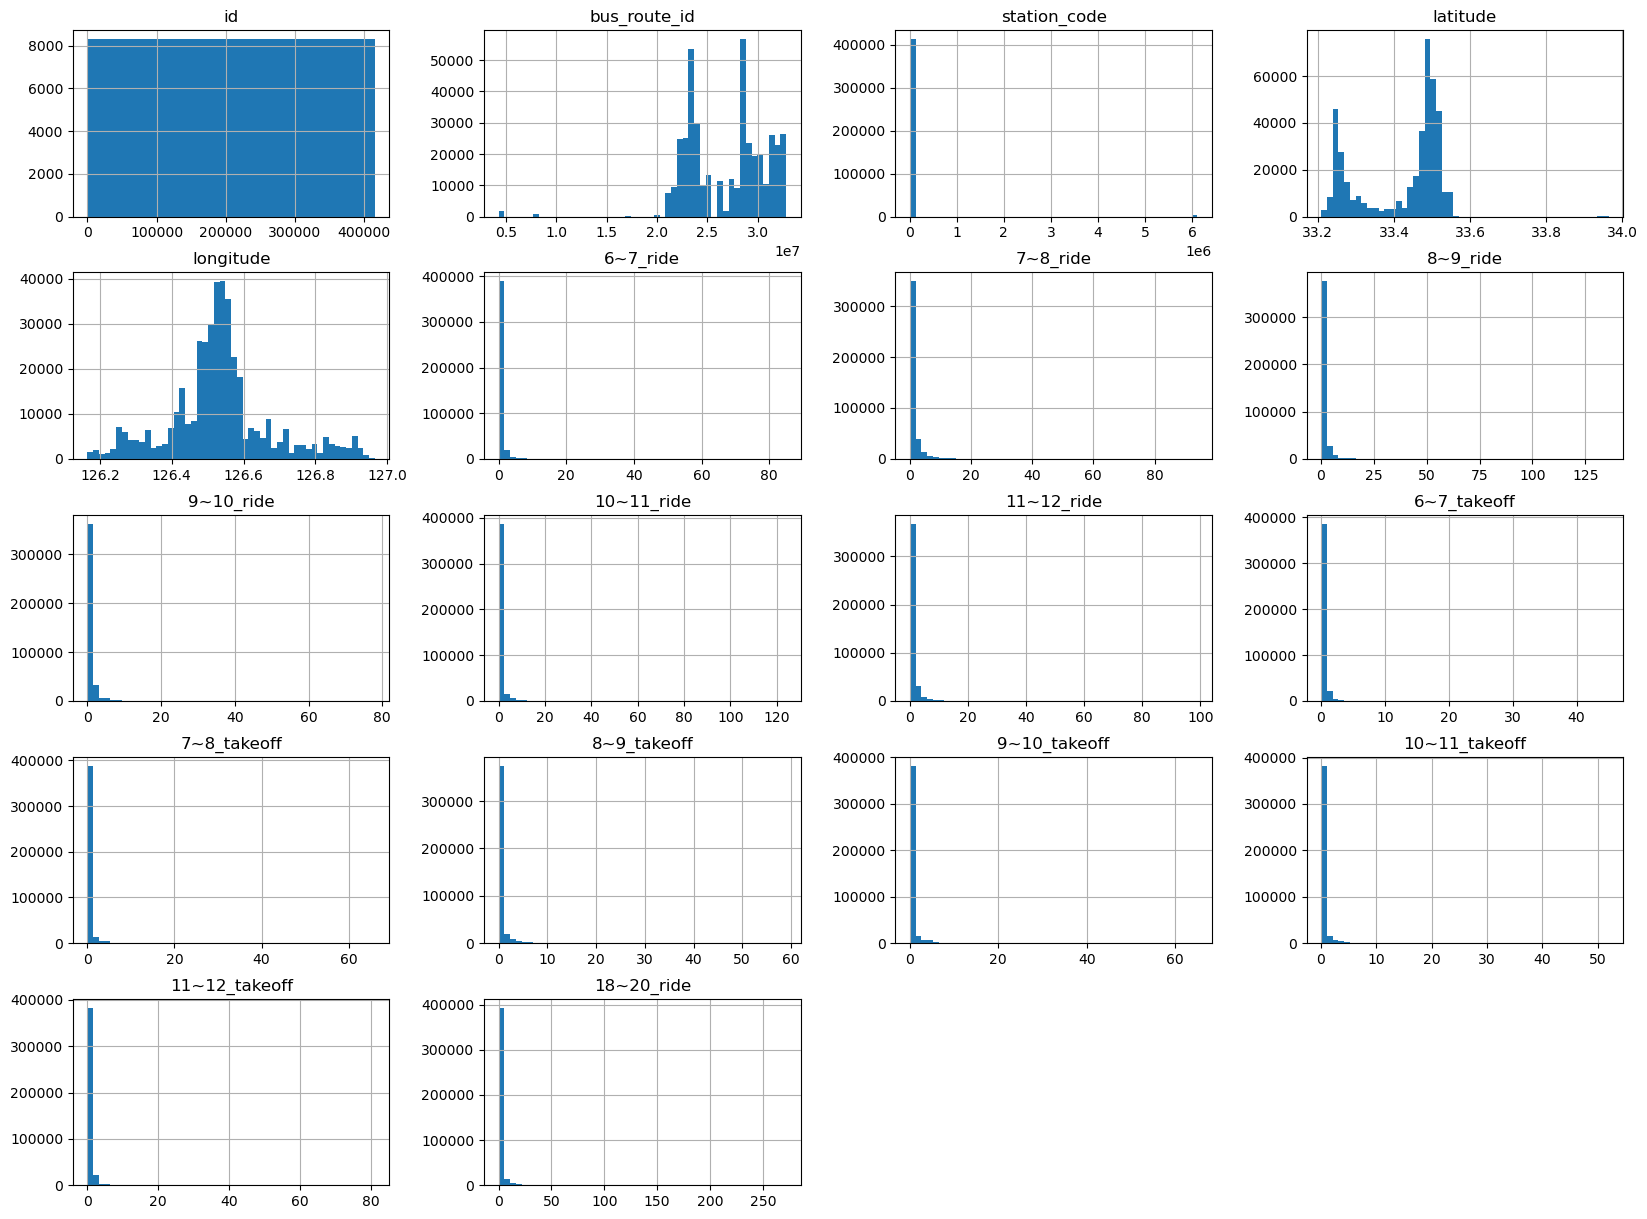

In [151]:
df_train.hist(bins=50, figsize=(20, 15))
plt.show()

## 막대 그래프

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


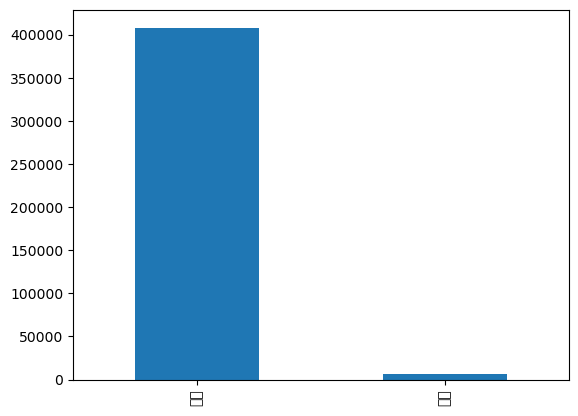

In [152]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 폰트가 깨져서 추가
df_train['in_out'].value_counts().plot.bar()
plt.show()

## 지리적 분석결과

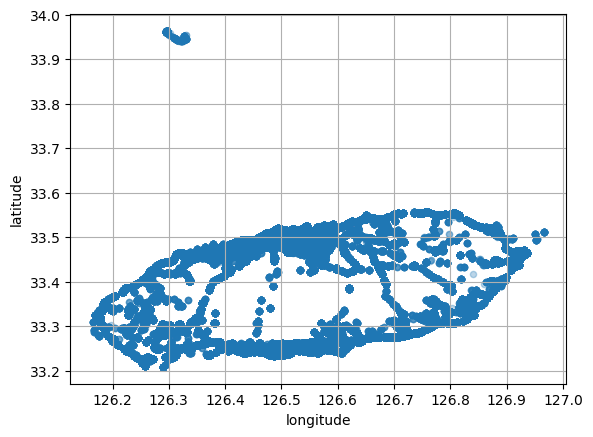

In [10]:
df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, grid=True)
plt.show()

In [153]:
# 승차 인원의 합
temp_ride = df_train['6~7_ride'] + df_train['7~8_ride'] + df_train['8~9_ride'] + df_train['9~10_ride'] + df_train['10~11_ride'] + df_train['11~12_ride']

#하차 인원의 합
temp_takeoff = df_train['6~7_takeoff'] + df_train['7~8_takeoff'] + df_train['8~9_takeoff'] + df_train['9~10_takeoff'] + df_train['10~11_takeoff'] + df_train['11~12_takeoff']

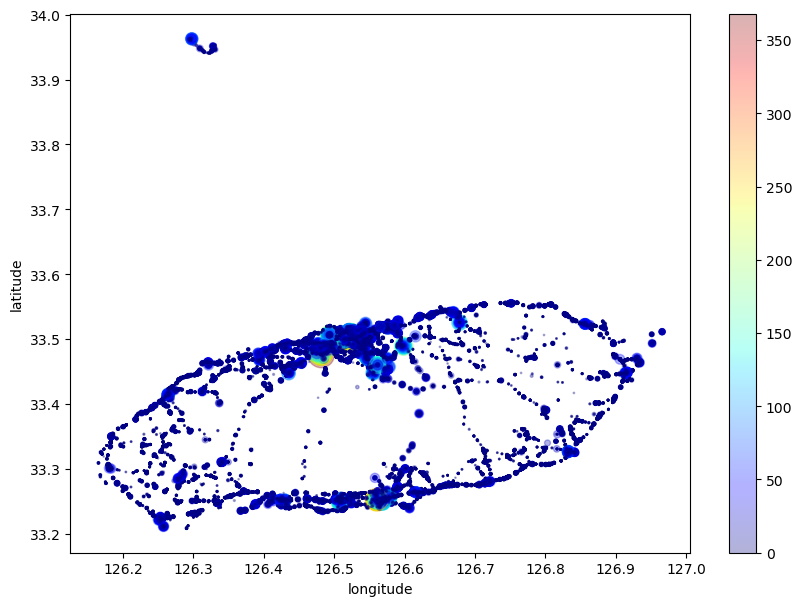

In [12]:
# 승차 인원
df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c=temp_ride, cmap='jet', figsize=(10, 7), s=temp_ride)
plt.show()

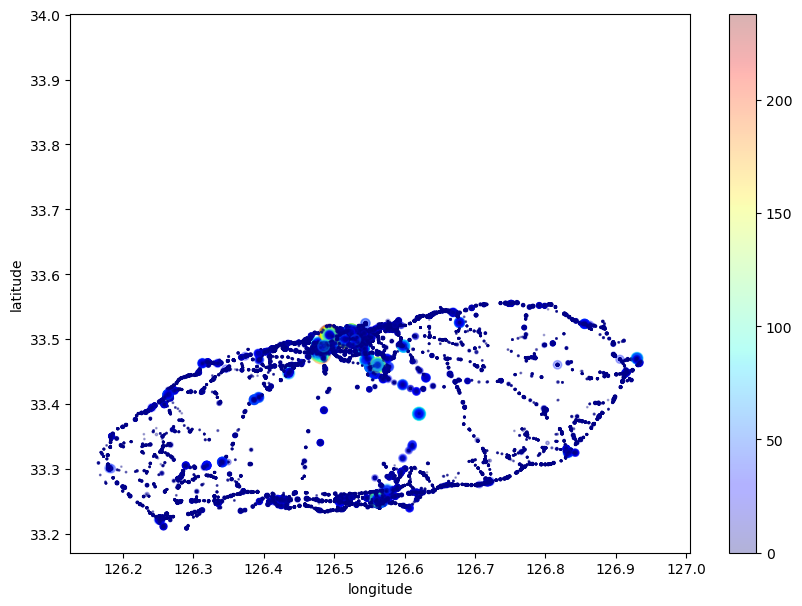

In [13]:
# 하차 인원
df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c=temp_takeoff, cmap='jet', figsize=(10, 7), s=temp_takeoff)
plt.show()

## 산점도

In [15]:
# 승차 인원 산점도
ride_attributes = ['11~12_ride', '10~11_ride', '9~10_ride', '8~9_ride', '7~8_ride', '6~7_ride']

pd.plotting.scatter_matrix(df_train[ride_attributes], figsize=(12, 12), alpha=0.3)
plt.show()

KeyboardInterrupt: 

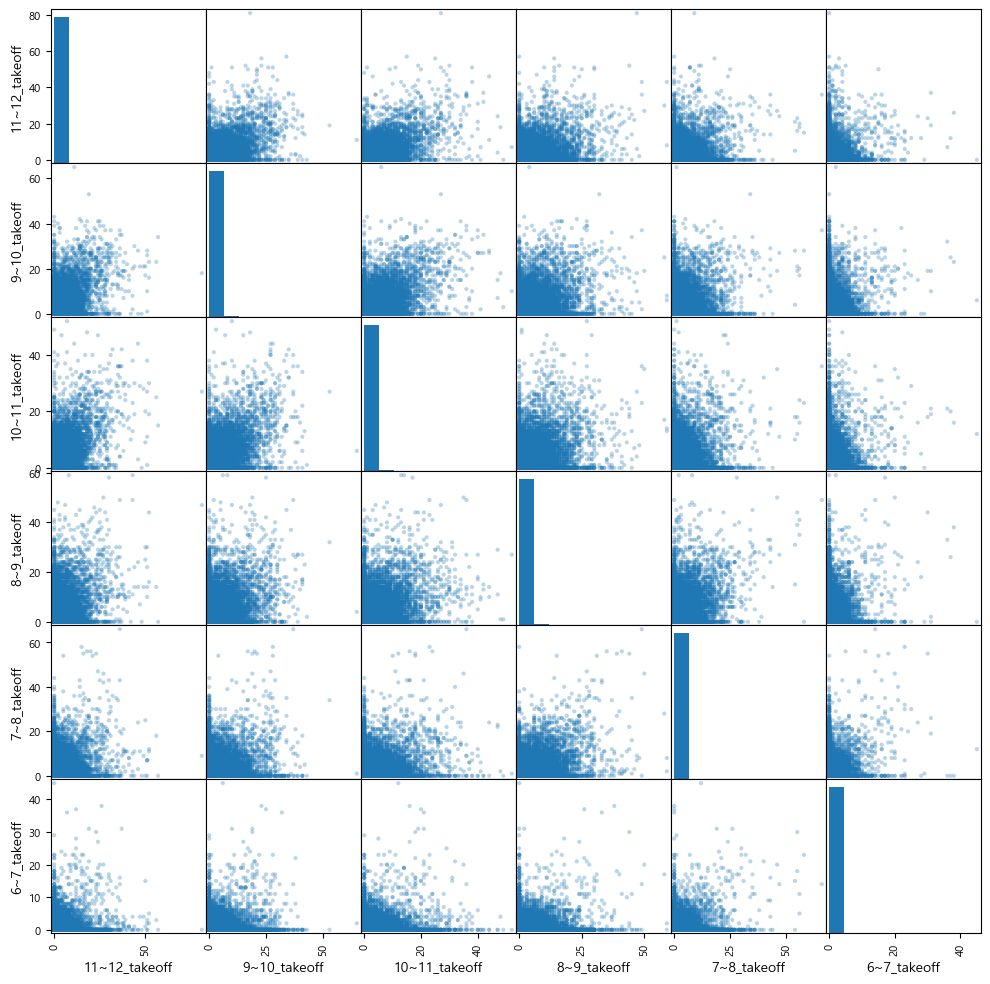

In [13]:
# 하차 인원 산점도
takeoff_attributes = ['11~12_takeoff', '9~10_takeoff', '10~11_takeoff', '8~9_takeoff', '7~8_takeoff', '6~7_takeoff']

pd.plotting.scatter_matrix(df_train[takeoff_attributes], figsize=(12, 12), alpha=0.3)
plt.show()

## 히트맵

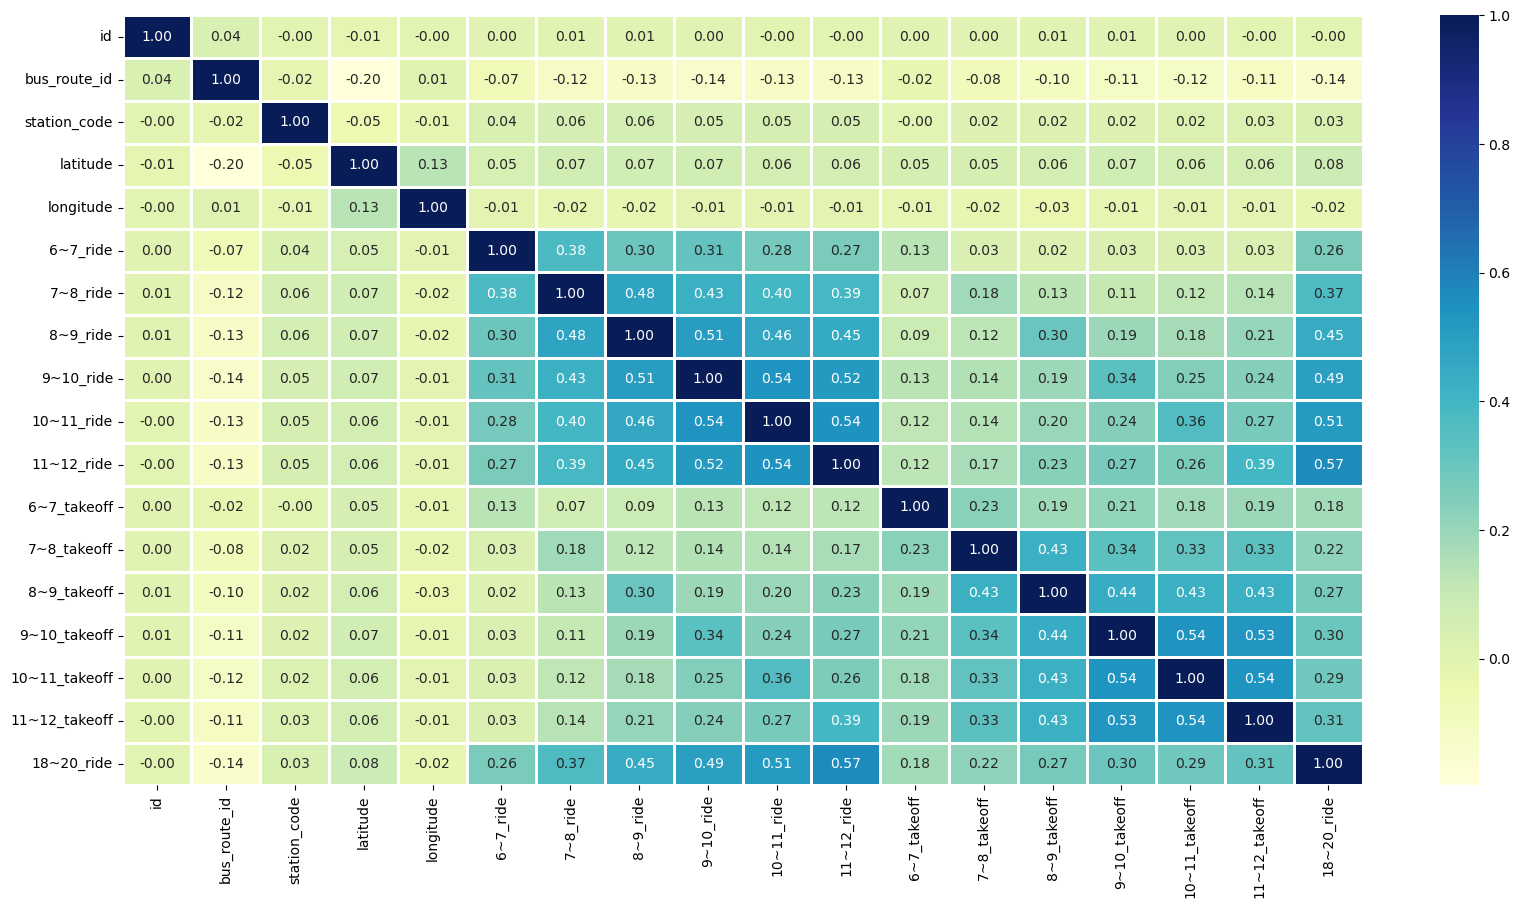

In [154]:
plt.figure(figsize=(20, 10))

sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

## 전체 승하차 인원

In [155]:
# 승차인원 및 하차인원 총계 column 추가
df_train['ride_sum'] = df_train['6~7_ride'] + df_train['7~8_ride'] + df_train['8~9_ride'] + df_train['9~10_ride'] + df_train['10~11_ride'] + df_train['11~12_ride']
df_train['takeoff_sum'] = df_train['6~7_takeoff'] + df_train['7~8_takeoff'] + df_train['8~9_takeoff'] + df_train['9~10_takeoff'] + df_train['10~11_takeoff'] + df_train['11~12_takeoff']

In [156]:
# 상관관계 간단히 보기
df_train.corr()['18~20_ride'].sort_values(ascending=False)

18~20_ride       1.000000
ride_sum         0.621556
11~12_ride       0.569747
10~11_ride       0.512666
9~10_ride        0.494085
8~9_ride         0.445316
takeoff_sum      0.383496
7~8_ride         0.371751
11~12_takeoff    0.313540
9~10_takeoff     0.295875
10~11_takeoff    0.290691
8~9_takeoff      0.274360
6~7_ride         0.262173
7~8_takeoff      0.219430
6~7_takeoff      0.178353
latitude         0.079261
station_code     0.034360
id              -0.000544
longitude       -0.021368
bus_route_id    -0.143702
Name: 18~20_ride, dtype: float64

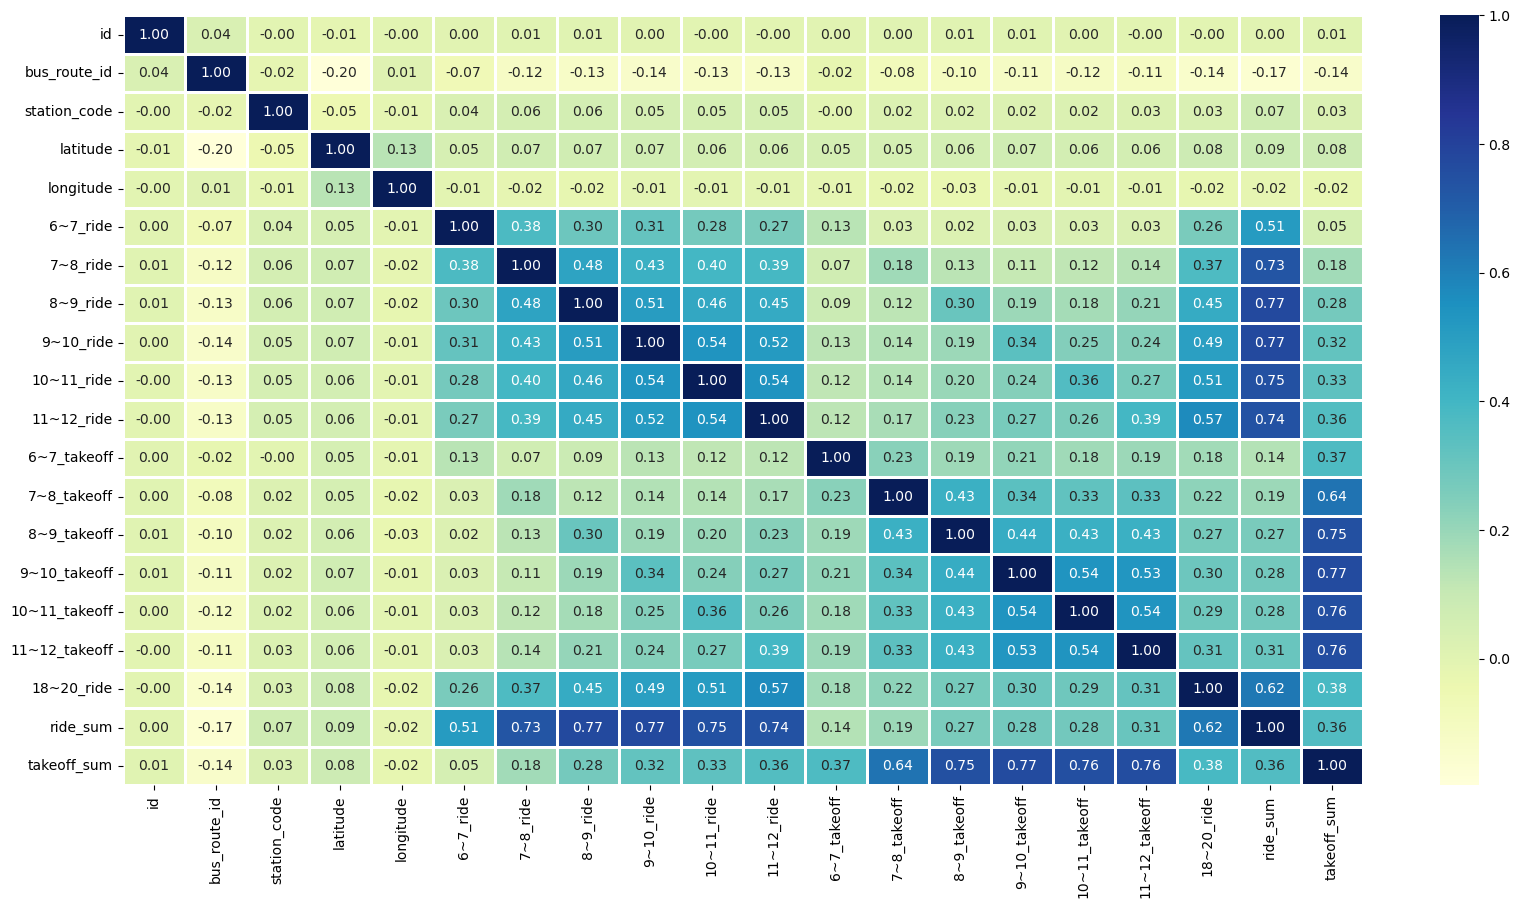

In [157]:
plt.figure(figsize=(20, 10))

sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

## 요일별 탑승자 수

In [158]:
df_train['date'] = pd.to_datetime(df_train['date'])

df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

In [159]:
df_train['weekday'] = df_train['date'].dt.weekday # 0 ~ 6 / 월 ~ 일

mon_sum = df_train[df_train['weekday'] == 0]['ride_sum'].sum()
tue_sum = df_train[df_train['weekday'] == 1]['ride_sum'].sum()
wed_sum = df_train[df_train['weekday'] == 2]['ride_sum'].sum()
thu_sum = df_train[df_train['weekday'] == 3]['ride_sum'].sum()
fri_sum = df_train[df_train['weekday'] == 4]['ride_sum'].sum()
sat_sum = df_train[df_train['weekday'] == 5]['ride_sum'].sum()
sun_sum = df_train[df_train['weekday'] == 6]['ride_sum'].sum()

In [160]:
mon_sum, tue_sum, wed_sum, thu_sum, fri_sum, sat_sum, sun_sum

(322173.0, 268168.0, 255937.0, 232038.0, 213170.0, 133743.0, 141924.0)

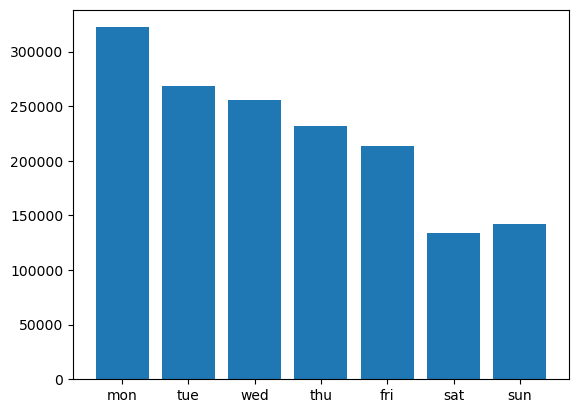

In [161]:
days_name = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
days_sum = [mon_sum, tue_sum, wed_sum, thu_sum, fri_sum, sat_sum, sun_sum]

plt.bar(days_name, days_sum)
plt.show()

In [162]:
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,ride_sum,takeoff_sum,year,month,day,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0.0,16.0,0.0,2019,9,1,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,0.0,5.0,22.0,0.0,2019,9,1,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,2.0,4.0,0.0,2019,9,1,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,0.0,53.0,79.0,0.0,2019,9,1,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,2019,9,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2019,9,30,0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2019,9,30,0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2019,9,30,0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2019,9,30,0


In [163]:
dummies = pd.get_dummies(df_train['weekday'], prefix='weekday')
dummies

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
415418,1,0,0,0,0,0,0
415419,1,0,0,0,0,0,0
415420,1,0,0,0,0,0,0
415421,1,0,0,0,0,0,0


In [164]:
# weekday : label encoding
# weekday_0 ~ weekday_6 : onehotencoding
df_train = pd.concat([df_train, dummies], axis=1)
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,month,day,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,9,1,6,0,0,0,0,0,0,1
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,9,1,6,0,0,0,0,0,0,1
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,9,1,6,0,0,0,0,0,0,1
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,9,1,6,0,0,0,0,0,0,1
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,9,1,6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,9,30,0,1,0,0,0,0,0,0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,9,30,0,1,0,0,0,0,0,0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,9,30,0,1,0,0,0,0,0,0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,9,30,0,1,0,0,0,0,0,0


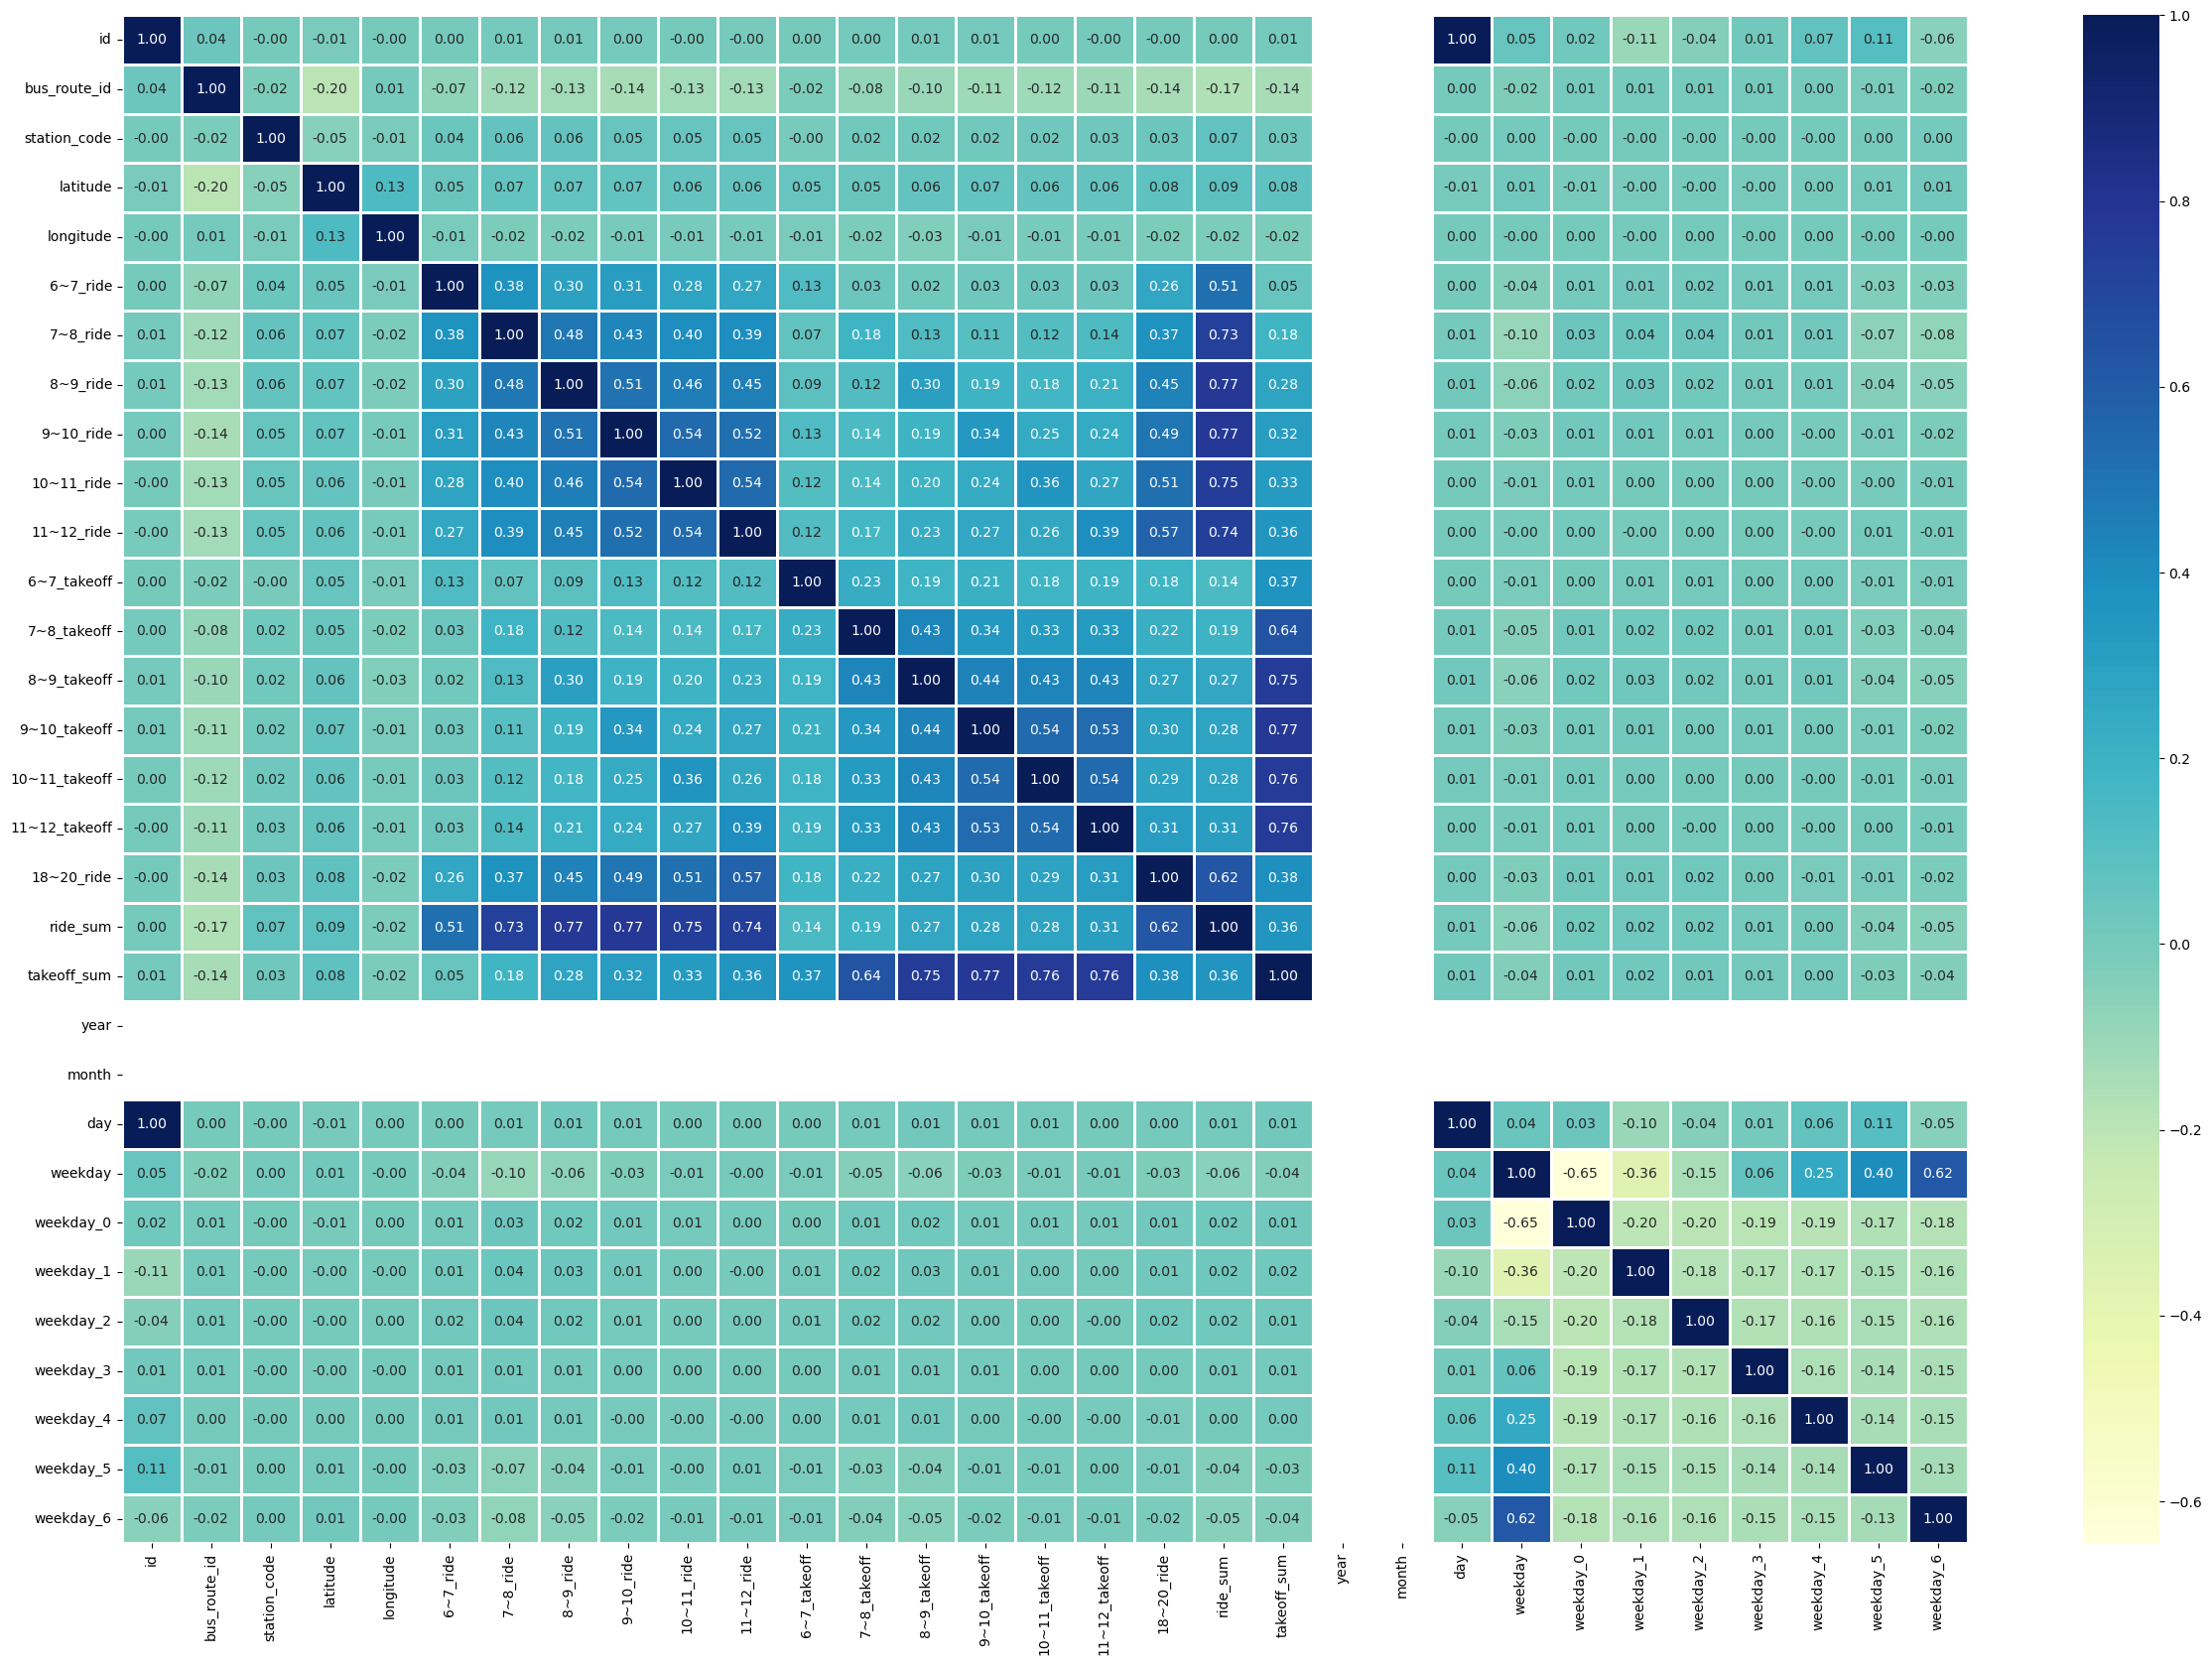

In [166]:
plt.figure(figsize=(30, 20))

sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

## 날씨 데이터 추가

### 각 정류장별 가장 가까운 관측소 추가

In [23]:
jeju=(33.51411, 126.52969)    # 제주 측정소 근처
gosan=(33.29382, 126.16283)   #고산 측정소 근처
seongsan=(33.38677, 126.8802) #성산 측정소 근처
seogwipo=(33.24616, 126.5653) #서귀포 측정소 근처

In [24]:
# 위-경도 정보만 따로 편집
location = list(zip(df_train['latitude'],df_train['longitude'] ))

In [25]:
# 각 정류장에서 측정소까지의 거리가 있음
dis_jeju = [math.sqrt((jeju[0] - i)**2 + (jeju[1] - j)**2) for i, j in location]
dis_gosan = [math.sqrt((gosan[0] - i)**2 + (gosan[1] - j)**2) for i, j in location]
dis_seongsan = [math.sqrt((seongsan[0] - i)**2 + (seongsan[1] - j)**2) for i, j in location]
dis_seogwipo = [math.sqrt((seogwipo[0] - i)**2 + (seogwipo[1] - j)**2) for i, j in location]

df_dis_jeju = pd.DataFrame(dis_jeju, columns=['jeju'])
df_dis_gosan = pd.DataFrame(dis_gosan, columns=['gosan'])
df_dis_seongsan = pd.DataFrame(dis_jeju, columns=['seongsan'])
df_dis_seogwipo = pd.DataFrame(dis_jeju, columns=['seogwipo'])

In [26]:
# 각 측정소 별 거리를 합침, column명은 측정소 이름
dis_total = pd.DataFrame(list(zip( dis_jeju, dis_gosan, dis_seongsan, dis_seogwipo)),columns=['jeju','gosan','seongsan','seogwipo'])
dis_total

,jeju,gosan,seongsan,seogwipo
0,0.043350,0.384633,0.399994,0.254030
1,0.050977,0.376978,0.408241,0.256165
2,0.064795,0.363137,0.417638,0.252892
3,0.038094,0.391942,0.405533,0.269619
4,0.283618,0.252649,0.485598,0.153003
...,...,...,...,...
415418,0.284394,0.156967,0.617457,0.345633
415419,0.020896,0.407632,0.382392,0.258287
415420,0.389126,0.118010,0.636815,0.302950
415421,0.216669,0.231387,0.566900,0.329588


In [27]:
# dis_total에서 행별로 최솟값에 정수 인덱스 반환
# 제주 0, 고산 1, 성산 2, 서귀포 3
near_index = dis_total.apply(lambda x: x.argmin(), axis=1)
near_index

0         0
1         0
2         0
3         0
4         3
         ..
415418    1
415419    0
415420    1
415421    0
415422    3
Length: 415423, dtype: int64

In [28]:
df_train = pd.concat([df_train, near_index], axis=1)
df_train = df_train.rename(columns={0: '지점명'})
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,day,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,지점명
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,1,6,0,0,0,0,0,0,1,0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,1,6,0,0,0,0,0,0,1,0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,1,6,0,0,0,0,0,0,1,0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,1,6,0,0,0,0,0,0,1,0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,1,6,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,30,0,1,0,0,0,0,0,0,1
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,30,0,1,0,0,0,0,0,0,0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,30,0,1,0,0,0,0,0,0,1
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,30,0,1,0,0,0,0,0,0,0


### 가장 가까운 관측소에 맞는 풍향, 강수량, 온도 추가

In [29]:
weather = pd.read_csv('./datasets/OBS_ASOS_TIM_20230314200606.csv',encoding='cp949')

In [30]:
weather['time'] = [ int( i.split(' ')[1].split(':')[0] ) for i in weather['일시']] 
weather['date'] = [ i.split(' ')[0] for i in weather['일시'] ] 
weather.drop('일시', axis=1, inplace=True)

In [31]:
weather = weather[['date', 'time', '지점명', '기온(°C)', '강수량(mm)', '풍속(m/s)']]

In [32]:
weather.fillna(0.0, inplace=True)

In [33]:
weather = weather[((5 <= weather['time']) & (weather['time'] <= 13)) | ((17 <= weather['time']) & (weather['time'] <= 20))]
weather.reset_index(drop=True, inplace=True)
weather

,date,time,지점명,기온(°C),강수량(mm),풍속(m/s)
0,2019-09-01,5,제주,23.3,0.0,1.2
1,2019-09-01,6,제주,23.4,0.0,1.2
2,2019-09-01,7,제주,23.5,0.0,0.9
3,2019-09-01,8,제주,24.0,0.0,0.7
4,2019-09-01,9,제주,24.9,0.0,1.3
...,...,...,...,...,...,...
3167,2019-10-31,13,서귀포,20.8,0.0,1.6
3168,2019-10-31,17,서귀포,20.0,0.0,0.7
3169,2019-10-31,18,서귀포,18.7,0.0,1.3
3170,2019-10-31,19,서귀포,17.4,0.0,1.3


In [34]:
# 시간별 데이터 날씨정보 분할
weather_5 = weather[weather['time'] == 5]
weather_5.reset_index(drop=True, inplace=True)
weather_6 = weather[weather['time'] == 6]
weather_6.reset_index(drop=True, inplace=True)
weather_7 = weather[weather['time'] == 7]
weather_7.reset_index(drop=True, inplace=True)
weather_8 = weather[weather['time'] == 8]
weather_8.reset_index(drop=True, inplace=True)
weather_9 = weather[weather['time'] == 9]
weather_9.reset_index(drop=True, inplace=True)
weather_10 = weather[weather['time'] == 10]
weather_10.reset_index(drop=True, inplace=True)
weather_11 = weather[weather['time'] == 11]
weather_11.reset_index(drop=True, inplace=True)

weather_12 = weather[weather['time'] == 12]
weather_12.reset_index(drop=True, inplace=True)
weather_13 = weather[weather['time'] == 13]
weather_13.reset_index(drop=True, inplace=True)

weather_17 = weather[weather['time'] == 17]
weather_17.reset_index(drop=True, inplace=True)
weather_18 = weather[weather['time'] == 18]
weather_18.reset_index(drop=True, inplace=True)
weather_19 = weather[weather['time'] == 19]
weather_19.reset_index(drop=True, inplace=True)
weather_20 = weather[weather['time'] == 20]
weather_20.reset_index(drop=True, inplace=True)

In [35]:
weather_5

,date,time,지점명,기온(°C),강수량(mm),풍속(m/s)
0,2019-09-01,5,제주,23.3,0.0,1.2
1,2019-09-02,5,제주,23.6,0.0,3.3
2,2019-09-03,5,제주,22.8,0.0,5.5
3,2019-09-04,5,제주,24.2,0.0,0.8
4,2019-09-05,5,제주,24.3,0.0,2.1
...,...,...,...,...,...,...
239,2019-10-27,5,서귀포,14.1,0.0,1.5
240,2019-10-28,5,서귀포,15.6,0.0,0.5
241,2019-10-29,5,서귀포,16.2,0.0,0.7
242,2019-10-30,5,서귀포,13.3,0.0,1.4


In [36]:
# 날짜별 풍속 및 강수량 저장용 df생성
new_weather = pd.DataFrame(data=weather[['date', '지점명']])
new_weather.drop_duplicates(inplace=True, ignore_index=True)

new_weather

,date,지점명
0,2019-09-01,제주
1,2019-09-02,제주
2,2019-09-03,제주
3,2019-09-04,제주
4,2019-09-05,제주
...,...,...
239,2019-10-27,서귀포
240,2019-10-28,서귀포
241,2019-10-29,서귀포
242,2019-10-30,서귀포


In [37]:
# join을 위한 키 생성
new_weather['date'] = pd.to_datetime(new_weather['date'])

new_weather['month'] = new_weather['date'].dt.month
new_weather['day'] = new_weather['date'].dt.day
new_weather

,date,지점명,month,day
0,2019-09-01,제주,9,1
1,2019-09-02,제주,9,2
2,2019-09-03,제주,9,3
3,2019-09-04,제주,9,4
4,2019-09-05,제주,9,5
...,...,...,...,...
239,2019-10-27,서귀포,10,27
240,2019-10-28,서귀포,10,28
241,2019-10-29,서귀포,10,29
242,2019-10-30,서귀포,10,30


In [38]:
# 각 구간별 강수량 추가
new_weather['5_8_rain'] = (weather_5['강수량(mm)'] + weather_6['강수량(mm)'] + weather_7['강수량(mm)']) / 3
new_weather['8_10_rain'] = (weather_8['강수량(mm)'] + weather_9['강수량(mm)']) / 2
new_weather['10_12_rain'] = (weather_10['강수량(mm)'] + weather_11['강수량(mm)']) / 2
new_weather['17_20_rain'] = (weather_17['강수량(mm)'] + weather_18['강수량(mm)'] + weather_19['강수량(mm)'] + weather_20['강수량(mm)']) / 4

# 각 구간별 풍향 추가
new_weather['5_8_wind'] = (weather_5['풍속(m/s)'] + weather_6['풍속(m/s)'] + weather_7['풍속(m/s)']) / 3
new_weather['8_10_wind'] = (weather_8['풍속(m/s)'] + weather_9['풍속(m/s)']) / 2
new_weather['10_12_wind'] = (weather_10['풍속(m/s)'] + weather_11['풍속(m/s)']) / 2
new_weather['17_20_wind'] = (weather_17['풍속(m/s)'] + weather_18['풍속(m/s)'] + weather_19['풍속(m/s)'] + weather_20['풍속(m/s)']) / 4

# 각 구간별 기온 추가
new_weather['5_8_temp'] = (weather_5['기온(°C)'] + weather_6['기온(°C)'] + weather_7['기온(°C)']) / 3
new_weather['8_10_temp'] = (weather_8['기온(°C)'] + weather_9['기온(°C)']) / 2
new_weather['10_12_temp'] = (weather_10['기온(°C)'] + weather_11['기온(°C)']) / 2
new_weather['17_20_temp'] = (weather_17['기온(°C)'] + weather_18['기온(°C)'] + weather_19['기온(°C)'] + weather_20['기온(°C)']) / 4

In [144]:
new_weather

,month,day,5_8_rain,8_10_rain,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp,지점
0,9,1,0.000000,0.00,0.00,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
1,9,2,0.633333,10.15,0.75,0.000,3.466667,4.65,1.30,1.450,23.400000,22.25,22.85,25.525,0.0
2,9,3,3.166667,1.30,0.15,0.250,2.533333,0.95,1.85,2.550,22.866667,24.15,25.05,24.650,0.0
3,9,4,0.000000,16.70,0.75,0.000,1.133333,1.35,2.20,1.350,24.266667,24.40,24.45,25.700,0.0
4,9,5,0.033333,0.00,0.00,0.550,1.533333,1.05,0.80,2.325,24.033333,26.45,28.00,25.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,10,27,0.000000,0.00,0.00,0.000,1.566667,0.90,1.95,0.850,14.133333,16.50,18.05,17.550,3.0
240,10,28,0.000000,0.00,0.00,0.000,0.766667,1.00,1.05,0.975,15.466667,16.70,17.65,17.225,3.0
241,10,29,0.000000,0.00,0.00,0.000,0.800000,1.00,1.55,1.650,16.366667,17.20,20.10,17.500,3.0
242,10,30,0.000000,0.00,0.00,0.000,1.333333,1.10,1.45,1.375,13.400000,15.90,18.20,17.550,3.0


In [40]:
# 지점명에 대한 코드 부여
# 제주 0, 고산 1, 성산 2, 서귀포 3
new_weather['지점'] = np.nan

new_weather.loc[new_weather['지점명'] == '제주', '지점'] = 0
new_weather.loc[new_weather['지점명'] == '고산', '지점'] = 1
new_weather.loc[new_weather['지점명'] == '성산', '지점'] = 2
new_weather.loc[new_weather['지점명'] == '서귀포', '지점'] = 3

new_weather

,date,지점명,month,day,5_8_rain,8_10_rain,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp,지점
0,2019-09-01,제주,9,1,0.000000,0.00,0.00,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
1,2019-09-02,제주,9,2,0.633333,10.15,0.75,0.000,3.466667,4.65,1.30,1.450,23.400000,22.25,22.85,25.525,0.0
2,2019-09-03,제주,9,3,3.166667,1.30,0.15,0.250,2.533333,0.95,1.85,2.550,22.866667,24.15,25.05,24.650,0.0
3,2019-09-04,제주,9,4,0.000000,16.70,0.75,0.000,1.133333,1.35,2.20,1.350,24.266667,24.40,24.45,25.700,0.0
4,2019-09-05,제주,9,5,0.033333,0.00,0.00,0.550,1.533333,1.05,0.80,2.325,24.033333,26.45,28.00,25.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019-10-27,서귀포,10,27,0.000000,0.00,0.00,0.000,1.566667,0.90,1.95,0.850,14.133333,16.50,18.05,17.550,3.0
240,2019-10-28,서귀포,10,28,0.000000,0.00,0.00,0.000,0.766667,1.00,1.05,0.975,15.466667,16.70,17.65,17.225,3.0
241,2019-10-29,서귀포,10,29,0.000000,0.00,0.00,0.000,0.800000,1.00,1.55,1.650,16.366667,17.20,20.10,17.500,3.0
242,2019-10-30,서귀포,10,30,0.000000,0.00,0.00,0.000,1.333333,1.10,1.45,1.375,13.400000,15.90,18.20,17.550,3.0


In [41]:
new_weather.drop(['date', '지점명'], axis=1, inplace=True)
new_weather

,month,day,5_8_rain,8_10_rain,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp,지점
0,9,1,0.000000,0.00,0.00,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
1,9,2,0.633333,10.15,0.75,0.000,3.466667,4.65,1.30,1.450,23.400000,22.25,22.85,25.525,0.0
2,9,3,3.166667,1.30,0.15,0.250,2.533333,0.95,1.85,2.550,22.866667,24.15,25.05,24.650,0.0
3,9,4,0.000000,16.70,0.75,0.000,1.133333,1.35,2.20,1.350,24.266667,24.40,24.45,25.700,0.0
4,9,5,0.033333,0.00,0.00,0.550,1.533333,1.05,0.80,2.325,24.033333,26.45,28.00,25.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,10,27,0.000000,0.00,0.00,0.000,1.566667,0.90,1.95,0.850,14.133333,16.50,18.05,17.550,3.0
240,10,28,0.000000,0.00,0.00,0.000,0.766667,1.00,1.05,0.975,15.466667,16.70,17.65,17.225,3.0
241,10,29,0.000000,0.00,0.00,0.000,0.800000,1.00,1.55,1.650,16.366667,17.20,20.10,17.500,3.0
242,10,30,0.000000,0.00,0.00,0.000,1.333333,1.10,1.45,1.375,13.400000,15.90,18.20,17.550,3.0


In [42]:
# df_train에 join

df_train = df_train.merge(new_weather, left_on=['month', 'day', '지점명'], right_on=['month', 'day', '지점'], how='left')
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp,지점
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,1.500,1.266667,1.35,1.25,2.400,22.500000,24.00,24.85,21.550,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550,1.0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750,0.0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550,1.0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750,0.0


In [43]:
df_train.drop(['지점명', '지점'], axis=1, inplace=True)
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,1.500,1.266667,1.35,1.25,2.400,22.500000,24.00,24.85,21.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,0.0,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,0.0,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750


In [146]:
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
date,2019-09-01,2019-09-01,2019-09-01,2019-09-01,2019-09-01
bus_route_id,4270000,4270000,4270000,4270000,4270000
in_out,시외,시외,시외,시내,시내
station_code,344,357,432,1579,1646
station_name,제주썬호텔,한라병원,정존마을,제주국제공항(600번),중문관광단지입구
latitude,33.4899,33.48944,33.48181,33.50577,33.25579
longitude,126.49373,126.48508,126.47352,126.49252,126.4126
6~7_ride,0.0,1.0,1.0,0.0,0.0
7~8_ride,1.0,4.0,1.0,17.0,0.0


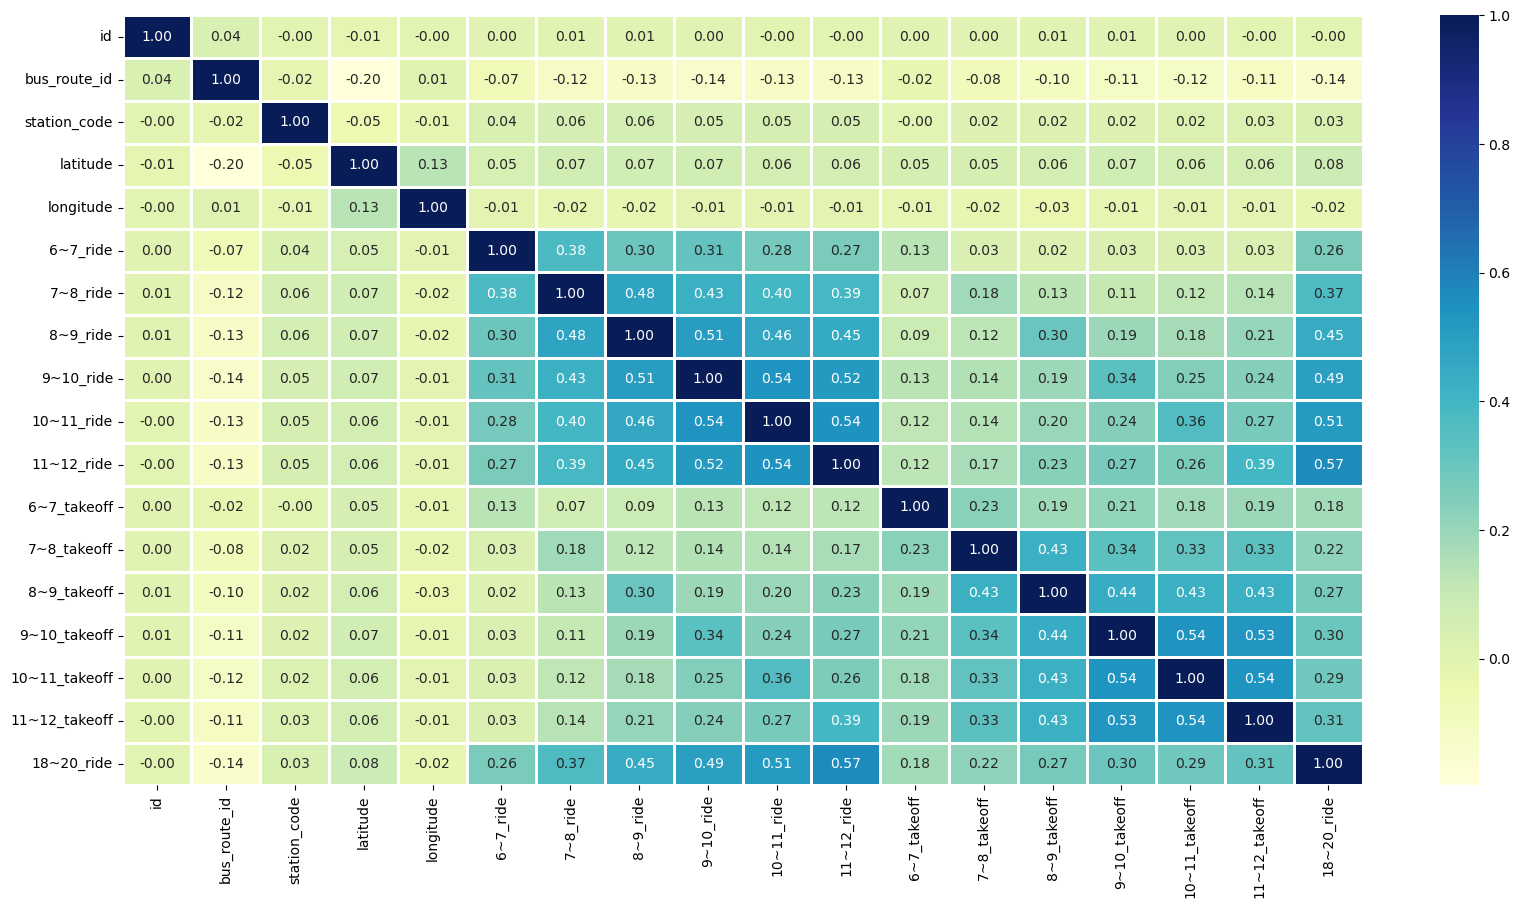

In [145]:
plt.figure(figsize=(20, 10))

sns.heatmap(data=df_train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

## 데이터 전처리

In [45]:
# 시내/시외 맵핑
mapping_dict = {'시내': 0, '시외': 1}

df_train['in_out'] = df_train['in_out'].map(mapping_dict)

In [46]:
df_station = df_train[['station_code', 'station_name']]

df_train.drop('station_name', axis=1, inplace=True)

In [47]:
df_train

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,10_12_rain,17_20_rain,5_8_wind,8_10_wind,10_12_wind,17_20_wind,5_8_temp,8_10_temp,10_12_temp,17_20_temp
0,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
1,1,2019-09-01,4270000,1,357,33.48944,126.48508,1.0,4.0,4.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
2,2,2019-09-01,4270000,1,432,33.48181,126.47352,1.0,1.0,0.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
3,3,2019-09-01,4270000,0,1579,33.50577,126.49252,0.0,17.0,6.0,...,0.0,3.375,1.100000,1.00,2.25,2.300,23.400000,24.45,26.05,21.925
4,4,2019-09-01,4270000,0,1646,33.25579,126.41260,0.0,0.0,0.0,...,0.0,1.500,1.266667,1.35,1.25,2.400,22.500000,24.00,24.85,21.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,33.41437,126.26336,4.0,0.0,0.0,...,0.0,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550
415419,415419,2019-09-30,32820000,0,1564,33.49946,126.51479,4.0,0.0,0.0,...,0.0,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750
415420,415420,2019-09-30,32820000,0,2322,33.23100,126.26273,0.0,0.0,0.0,...,0.0,9.375,3.400000,3.40,2.00,2.975,22.400000,23.75,25.45,23.550
415421,415421,2019-09-30,32820000,0,3291,33.46483,126.31870,1.0,0.0,0.0,...,0.0,2.550,0.433333,0.95,2.00,1.225,22.866667,23.70,25.00,23.750


In [109]:
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
date,2019-09-01 00:00:00,2019-09-01 00:00:00,2019-09-01 00:00:00,2019-09-01 00:00:00,2019-09-01 00:00:00
bus_route_id,4270000,4270000,4270000,4270000,4270000
in_out,1,1,1,0,0
station_code,344,357,432,1579,1646
latitude,33.4899,33.48944,33.48181,33.50577,33.25579
longitude,126.49373,126.48508,126.47352,126.49252,126.4126
6~7_ride,0.0,1.0,1.0,0.0,0.0
7~8_ride,1.0,4.0,1.0,17.0,0.0
8~9_ride,2.0,4.0,0.0,6.0,0.0


In [48]:
df_train.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415423 entries, 0 to 415422
Data columns (total 45 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             415423 non-null  int64         
 1   date           415423 non-null  datetime64[ns]
 2   bus_route_id   415423 non-null  int64         
 3   in_out         415423 non-null  int64         
 4   station_code   415423 non-null  int64         
 5   latitude       415423 non-null  float64       
 6   longitude      415423 non-null  float64       
 7   6~7_ride       415423 non-null  float64       
 8   7~8_ride       415423 non-null  float64       
 9   8~9_ride       415423 non-null  float64       
 10  9~10_ride      415423 non-null  float64       
 11  10~11_ride     415423 non-null  float64       
 12  11~12_ride     415423 non-null  float64       
 13  6~7_takeoff    415423 non-null  float64       
 14  7~8_takeoff    415423 non-null  float64       
 15  

## 인구 데이터 처리

In [50]:
df_pop = pd.read_csv('./datasets/jeju dong and geomtry.csv')
#인구 데이터

In [51]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       43 non-null     object 
 1   Sep_pop    43 non-null     object 
 2   Oct_pop    43 non-null     object 
 3   latitude   43 non-null     float64
 4   longitude  43 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.8+ KB


In [52]:
#인포 데이터 처리
# 오브젝트가 있어서 처리하기 위함.
df_pop.replace(',', '',regex=True, inplace=True) #인구에 ,가 있어 지움

In [53]:
df_pop = df_pop.astype({'Sep_pop' :'int', 'Oct_pop' : 'int'})
# 인구 숫자형으로 바꾸기

In [54]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       43 non-null     object 
 1   Sep_pop    43 non-null     int64  
 2   Oct_pop    43 non-null     int64  
 3   latitude   43 non-null     float64
 4   longitude  43 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


### 위경도 데이터를 활용하기 위한 전처리

#### 스테이션 코드의 위경도 받기

In [55]:
# 스테이션 코드의 위경도 받기
t1 = list(df_train.loc[:,['latitude', 'longitude']].groupby(df_train['station_code']))

In [56]:
t1 
#t1에는 스테이션코드 마다의 위경도를 정리한 값이 들어있음.

[(1,
          latitude  longitude
  3795    33.52438  126.54433
  3860    33.52438  126.54433
  3969    33.52438  126.54433
  4175    33.52438  126.54433
  4210    33.52438  126.54433
  ...          ...        ...
  391386  33.52438  126.54433
  404217  33.52438  126.54433
  404288  33.52438  126.54433
  404407  33.52438  126.54433
  404659  33.52438  126.54433
  
  [132 rows x 2 columns]),
 (2,
          latitude  longitude
  1549    33.49527  126.45618
  1824    33.49527  126.45618
  3245    33.49527  126.45618
  3343    33.49527  126.45618
  3446    33.49527  126.45618
  ...          ...        ...
  409642  33.49527  126.45618
  410524  33.49527  126.45618
  411096  33.49527  126.45618
  411228  33.49527  126.45618
  414440  33.49527  126.45618
  
  [352 rows x 2 columns]),
 (3,
          latitude  longitude
  1881    33.49546  126.45623
  3303    33.49546  126.45623
  3393    33.49546  126.45623
  7125    33.49546  126.45623
  7390    33.49546  126.45623
  ...          ...       

In [57]:
df_pop.head()

,Name,Sep_pop,Oct_pop,latitude,longitude
0,한림읍,25084,25110,33.376347,126.284734
1,애월읍,37194,37247,33.411040,126.393958
2,구좌읍,16323,16274,33.498076,126.795431
3,조천읍,25114,25155,33.472170,126.667445
4,한경면,9423,9432,33.322497,126.223161


In [62]:
sample=[] # 빈 리스트 
sample2 = [] # 빈리스트2
for i in range(len(t1)): #3563 반복
    sample=[] #매번 반복되면 데이터가 쌓여서 리셋함.
    for j in range(len(df_pop)): # 43 반복
        t1_latlong = t1[i][1].iloc[0][0], t1[i][1].iloc[0][1] # 스테이션 코드의 좌표
        t2_latlong = df_pop.iloc[j][3], df_pop.iloc[j][4] #행정동의 좌표
        sample.append(geopy.distance.geodesic(t1_latlong, t2_latlong).km) # 둘의 거리 계산
    sample2.append([t1[i][0], df_pop.loc[sample.index(min(sample))][1], min(sample)]) 
    # 스테이션코드, 9월 인구, 거리

In [63]:
df_sample2 = pd.DataFrame(sample2) #sample2의 df화

In [64]:
df_sample2.columns = ['station_code', 'Population', 'distance']
# 칼럼추가

In [69]:
df_train.drop('date', axis=1, inplace=True)

In [70]:
df_train_new = pd.merge(df_train, df_sample2)
# 스테이션 코드를 키값으로 인구를 추가시킴

In [90]:
df_train_new.head().T

,0,1,2,3,4
id,0.000000e+00,1.153800e+04,2.649800e+04,4.198300e+04,5.672200e+04
bus_route_id,4.270000e+06,4.270000e+06,4.270000e+06,4.270000e+06,4.270000e+06
in_out,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
station_code,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02
latitude,3.348990e+01,3.348990e+01,3.348990e+01,3.348990e+01,3.348990e+01
longitude,1.264937e+02,1.264937e+02,1.264937e+02,1.264937e+02,1.264937e+02
6~7_ride,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
7~8_ride,1.000000e+00,8.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00
8~9_ride,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,8.000000e+00
9~10_ride,5.000000e+00,3.000000e+00,7.000000e+00,2.000000e+00,0.000000e+00


In [141]:
df_train_new.corrwith(df_train_new['18~20_ride'])

id              -0.000544
bus_route_id    -0.143702
in_out           0.022116
station_code     0.034360
latitude         0.079261
longitude       -0.021368
6~7_ride         0.262173
7~8_ride         0.371751
8~9_ride         0.445316
9~10_ride        0.494085
10~11_ride       0.512666
11~12_ride       0.569747
6~7_takeoff      0.178353
7~8_takeoff      0.219430
8~9_takeoff      0.274360
9~10_takeoff     0.295875
10~11_takeoff    0.290691
11~12_takeoff    0.313540
18~20_ride       1.000000
ride_sum         0.621556
takeoff_sum      0.383496
year                  NaN
month                 NaN
day              0.004882
weekday         -0.028060
weekday_0        0.010301
weekday_1        0.011975
weekday_2        0.016708
weekday_3        0.001259
weekday_4       -0.014553
weekday_5       -0.013380
weekday_6       -0.016739
5_8_rain         0.000119
8_10_rain        0.011643
10_12_rain      -0.019538
17_20_rain      -0.030866
5_8_wind        -0.034264
8_10_wind       -0.024767
10_12_wind  

In [82]:
X = df_train_new.drop('18~20_ride', axis=1)
y = df_train_new['18~20_ride']

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [73]:
# 선형회귀
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model on the validation data
lin_scores = cross_val_score(lr_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
lin_rmse = np.sqrt(-lin_scores.mean())
lin_rmse

3.5545180352549886

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3, n_jobs=-1)
rf_rmse = np.sqrt(-rf_scores.mean())
rf_rmse

2.8318994889694067

In [168]:
from sklearn.model_selection import GridSearchCV

#rf_reg = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators' : [30, 50, 100], 'max_features' : [2, 4, 6, 8]} # 3 * 4 = 12가지 조합의 파라미터로 설정된 모델 준비

grid_search = GridSearchCV(rf_reg, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) # 3 * 4 * 5 = 60번의 학습과 검증
%time grid_search.fit(X_train, y_train)

CPU times: user 1min 20s, sys: 1.26 s, total: 1min 22s
Wall time: 6min 47s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             scoring='neg_mean_squared_error')

In [169]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [170]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
  print(np.sqrt(-mean_score), params)

3.13491180829705 {'max_features': 2, 'n_estimators': 30}
3.1219134461873654 {'max_features': 2, 'n_estimators': 50}
3.1167402412470757 {'max_features': 2, 'n_estimators': 100}
3.055518534948551 {'max_features': 4, 'n_estimators': 30}
3.018086272012644 {'max_features': 4, 'n_estimators': 50}
2.9886781786213374 {'max_features': 4, 'n_estimators': 100}
2.9836050999002675 {'max_features': 6, 'n_estimators': 30}
2.948083062464411 {'max_features': 6, 'n_estimators': 50}
2.9323963639175923 {'max_features': 6, 'n_estimators': 100}
2.945494323140511 {'max_features': 8, 'n_estimators': 30}
2.9130240590269487 {'max_features': 8, 'n_estimators': 50}
2.8959107968768905 {'max_features': 8, 'n_estimators': 100}


In [171]:
best_model = grid_search.best_estimator_

In [172]:
feature_importances = best_model.feature_importances_

In [173]:
feature_importances

array([0.02117701, 0.0349925 , 0.00084191, 0.03636482, 0.03676869,
       0.04382588, 0.01675109, 0.02602029, 0.0405862 , 0.05515653,
       0.05733832, 0.13170237, 0.01190502, 0.01415809, 0.0174036 ,
       0.01564889, 0.01823172, 0.02161038, 0.15994038, 0.04262834,
       0.        , 0.        , 0.00940653, 0.01008592, 0.00197001,
       0.00207656, 0.0020234 , 0.00177667, 0.00134009, 0.00134991,
       0.00257325, 0.00453178, 0.00431698, 0.00267667, 0.00508103,
       0.01150884, 0.01020356, 0.01009076, 0.01018911, 0.01066264,
       0.00961905, 0.0104166 , 0.0101875 , 0.02492394, 0.03993721])

In [174]:
attributes = (X_train.columns)

In [175]:
sorted(zip(feature_importances,attributes), reverse=True)

[(0.15994037965407035, 'ride_sum'),
 (0.13170236995784726, '11~12_ride'),
 (0.0573383169988175, '10~11_ride'),
 (0.055156527145150916, '9~10_ride'),
 (0.04382587622509868, 'longitude'),
 (0.042628343931001574, 'takeoff_sum'),
 (0.04058619786528094, '8~9_ride'),
 (0.039937214125804255, 'distance'),
 (0.036768686676060154, 'latitude'),
 (0.036364824410208316, 'station_code'),
 (0.034992500637354505, 'bus_route_id'),
 (0.02602029483708095, '7~8_ride'),
 (0.024923936729479835, 'Population'),
 (0.021610377174343463, '11~12_takeoff'),
 (0.021177014160740228, 'id'),
 (0.01823172203719811, '10~11_takeoff'),
 (0.017403598662881537, '8~9_takeoff'),
 (0.016751090671836544, '6~7_ride'),
 (0.015648886052205074, '9~10_takeoff'),
 (0.014158089385622592, '7~8_takeoff'),
 (0.011905015773134419, '6~7_takeoff'),
 (0.011508835575946374, '5_8_wind'),
 (0.0106626412845995, '5_8_temp'),
 (0.010416595432483952, '10_12_temp'),
 (0.010203555013306144, '8_10_wind'),
 (0.010189107199863658, '17_20_wind'),
 (0.010

In [104]:
rf_scores

array([-7.74367327, -8.25344716, -8.06184371])

In [75]:
### 그레디언트 ㅜ스팅

In [167]:
X.shape

(415423, 45)

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbrt = GradientBoostingRegressor(max_depth=5, n_estimators=150)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=150)

In [127]:
erros = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(erros) + 1
gbrt_best = GradientBoostingRegressor(max_depth=5, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=150)

In [128]:
final_pred=gbrt.predict(X)

In [129]:
final_pred.shape

(415423,)

In [130]:
# rmse 계산

In [131]:
MSE = np.square(np.subtract(y, final_pred)).mean()

In [132]:
MSE

6.149884557363595

In [133]:
np.sqrt(MSE)

2.47989607793625

In [134]:
final_pred_best_ver=gbrt_best.predict(X)

In [135]:
MSE = np.square(np.subtract(y, final_pred_best_ver)).mean()

In [136]:
np.sqrt(MSE)

2.480425402036967

svm을 쓸거면 표준화 정규화 아무거해라

array([[<AxesSubplot:title={'center':'Sep_pop'}>,
        <AxesSubplot:title={'center':'Oct_pop'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>]], dtype=object)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


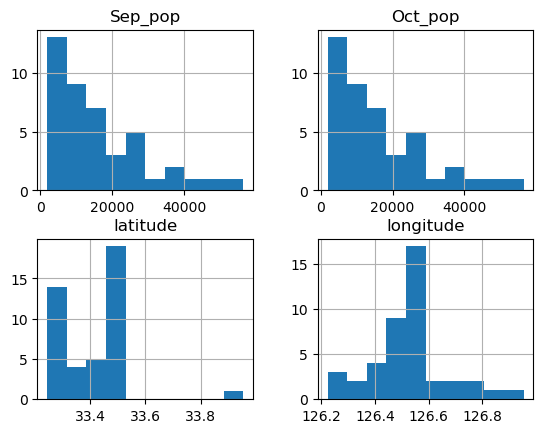

In [88]:
df_pop.hist()

In [89]:
df_pop

,Name,Sep_pop,Oct_pop,latitude,longitude
0,한림읍,25084,25110,33.376347,126.284734
1,애월읍,37194,37247,33.411040,126.393958
2,구좌읍,16323,16274,33.498076,126.795431
3,조천읍,25114,25155,33.472170,126.667445
4,한경면,9423,9432,33.322497,126.223161
5,추자면,2079,2067,33.954602,126.326894
6,우도면,1915,1915,33.505425,126.955464
7,일도1동,2868,2837,33.513013,126.527396
8,일도2동,34208,34177,33.506494,126.541002
9,이도1동,7815,7805,33.505451,126.527513
